# Assignment 1 K-Means Clustering

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishisukumar/student-screen-time-vs-cgpa-analysis-2026")

print("Path to dataset files:", path)

100%|██████████| 6.86k/6.86k [00:00<00:00, 6.13MB/s]

Extracting files...
Path to dataset files: C:\Users\mohya\.cache\kagglehub\datasets\rishisukumar\student-screen-time-vs-cgpa-analysis-2026\versions\1


In [69]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [9]:
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

['Student_Performance_2026.csv']


Task 1.1: Load and Describe Your Dataset

In [17]:
df = df.drop(columns=['student_ID'])

In [30]:
df.head()

,Age,Gender,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA,current_sem_CGPA
0,23,Female,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74,7.94
1,24,Female,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72,7.92
2,18,Female,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67,6.87
3,17,Male,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10,6.30
4,23,Female,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77,6.97


In [36]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Age,Gender,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA,current_sem_CGPA
0,23,0,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74,7.94
1,24,0,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72,7.92
2,18,0,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67,6.87
3,17,1,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10,6.30
4,23,0,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77,6.97


In [ ]:
# Fmeale = 0 and Male = 1
print(le.classes_)

[0 1]


In [38]:
df.shape

(546, 11)

In [39]:
df.dtypes

Age                          int64
Gender                       int64
daily_screen_time_hours    float64
social_media_hours         float64
online_study_hours         float64
gaming_hours               float64
sleep_hours                float64
attendance_percentage        int64
offline_study_hours        float64
previous_sem_CGPA          float64
current_sem_CGPA           float64
dtype: object

In [40]:
df.isnull().sum()

Age                        0
Gender                     0
daily_screen_time_hours    0
social_media_hours         0
online_study_hours         0
gaming_hours               0
sleep_hours                0
attendance_percentage      0
offline_study_hours        0
previous_sem_CGPA          0
current_sem_CGPA           0
dtype: int64

Task 1.2: Exploratory Data Analysis (EDA)

In [41]:
df.describe()

,Age,Gender,daily_screen_time_hours,social_media_hours,online_study_hours,gaming_hours,sleep_hours,attendance_percentage,offline_study_hours,previous_sem_CGPA,current_sem_CGPA
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,20.946886,0.523810,7.109341,2.843773,2.890659,1.422711,6.696886,72.970696,2.446520,7.142344,7.342344
std,2.587713,0.499891,1.774872,0.712978,1.774872,0.357921,0.947197,11.747772,0.393615,1.176701,1.176701
min,17.000000,0.000000,4.000000,1.600000,0.000000,0.800000,5.000000,55.000000,1.800000,5.300000,5.500000
25%,19.000000,0.000000,5.600000,2.200000,1.400000,1.100000,6.000000,63.000000,2.100000,6.100000,6.300000
50%,21.000000,1.000000,7.200000,2.900000,2.800000,1.400000,6.600000,72.000000,2.400000,7.080000,7.280000
75%,23.000000,1.000000,8.600000,3.400000,4.400000,1.700000,7.400000,81.000000,2.700000,7.930000,8.130000
max,25.000000,1.000000,10.000000,4.000000,6.000000,2.000000,8.500000,97.000000,3.300000,9.570000,9.770000


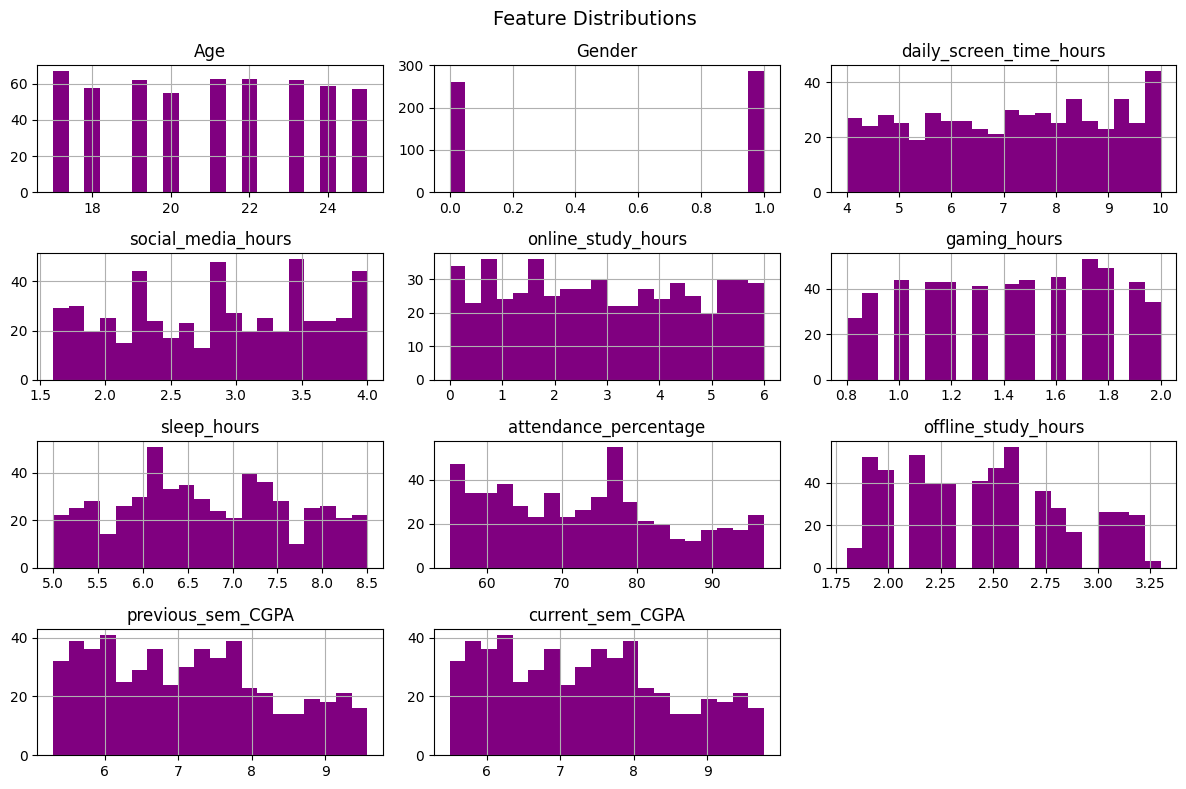

In [47]:
df.hist(figsize=(12, 8), bins=20, color='purple')
plt.suptitle('Feature Distributions', fontsize=14)
plt.tight_layout()
plt.show()

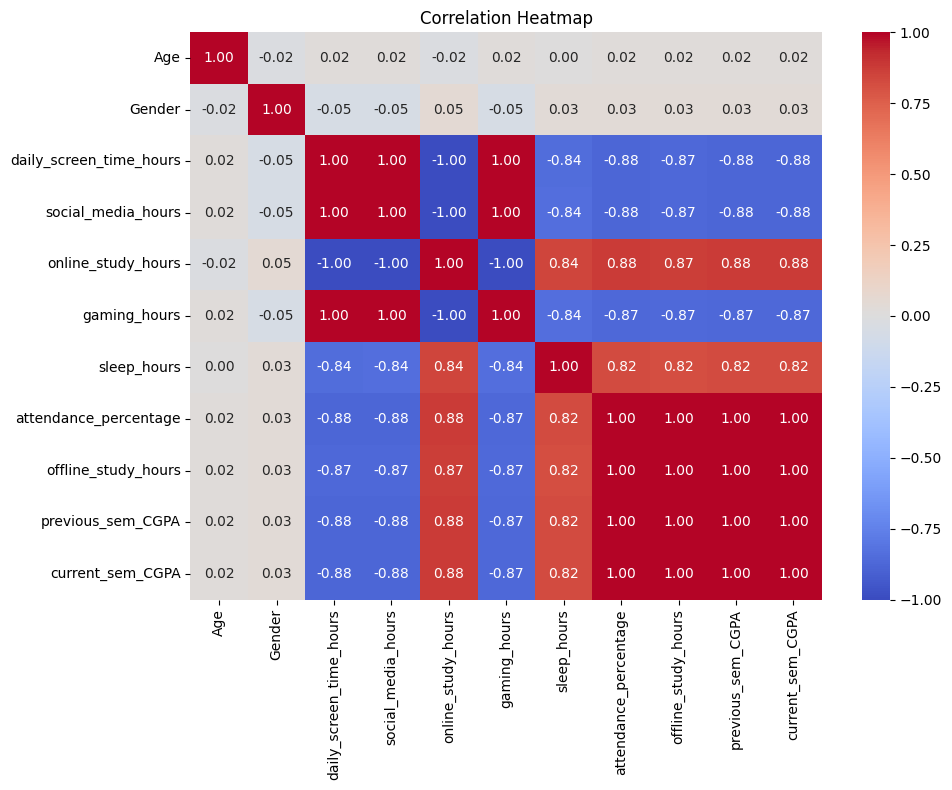

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Task 1.3: Feature Selection and Justification

In [55]:
features = ['daily_screen_time_hours', 'online_study_hours', 'sleep_hours', 'attendance_percentage', 'current_sem_CGPA']

X = df[features]

Task 2.1: Standardization

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Task 2.2: Create a Scaled DataFrame

In [64]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
#print(X_scaled_df.describe().round(2))
X_scaled_df.head()

,daily_screen_time_hours,online_study_hours,sleep_hours,attendance_percentage,current_sem_CGPA
0,-0.512811,0.512811,0.425976,0.513700,0.508374
1,-1.245930,1.245930,1.694033,0.513700,0.491362
2,0.445883,-0.445883,0.425976,-0.423506,-0.401782
3,1.630152,-1.630152,-0.842081,-0.849509,-0.886632
4,0.333095,-0.333095,-0.313724,-0.338306,-0.316721


Task 3.1: Elbow Method (WCSS)

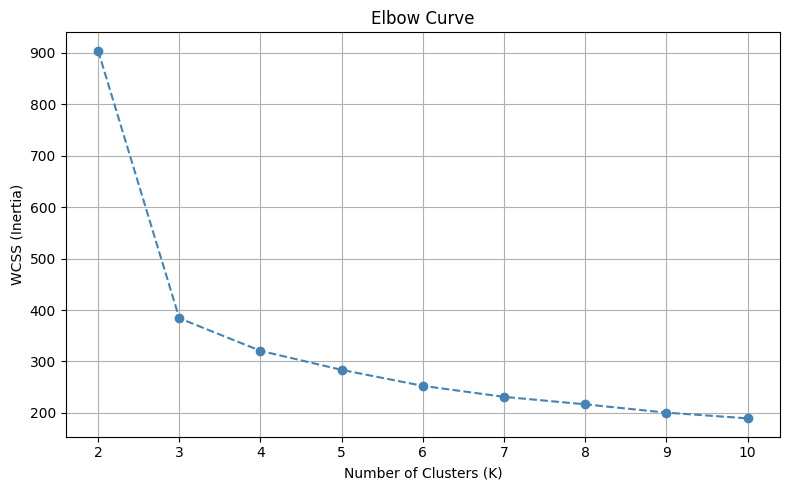

K=2 -> WCSS: 903.70
K=3 -> WCSS: 383.95
K=4 -> WCSS: 320.73
K=5 -> WCSS: 283.73
K=6 -> WCSS: 252.64
K=7 -> WCSS: 231.35
K=8 -> WCSS: 216.80
K=9 -> WCSS: 200.67
K=10 -> WCSS: 189.58


In [ ]:
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='steelblue')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# WCSS values
for k, w in zip(k_range, wcss):
    print(f"K={k} -> WCSS: {w:.2f}")

Task 3.2: Silhouette Score

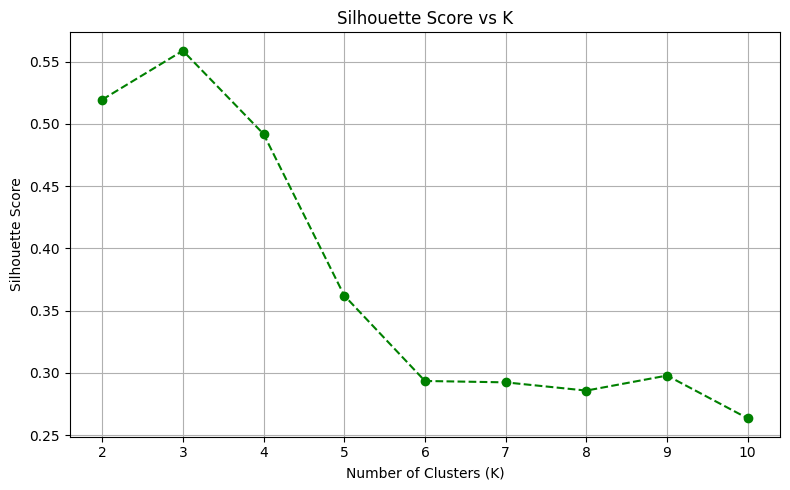

K=2 -> Silhouette Score: 0.5195
K=3 -> Silhouette Score: 0.5588
K=4 -> Silhouette Score: 0.4919
K=5 -> Silhouette Score: 0.3622
K=6 -> Silhouette Score: 0.2936
K=7 -> Silhouette Score: 0.2925
K=8 -> Silhouette Score: 0.2859
K=9 -> Silhouette Score: 0.2980
K=10 -> Silhouette Score: 0.2636


In [ ]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print scores
for k, s in zip(k_range, silhouette_scores):
    print(f"K={k} -> Silhouette Score: {s:.4f}")

Task 3.3: Calinski-Harabasz Index 

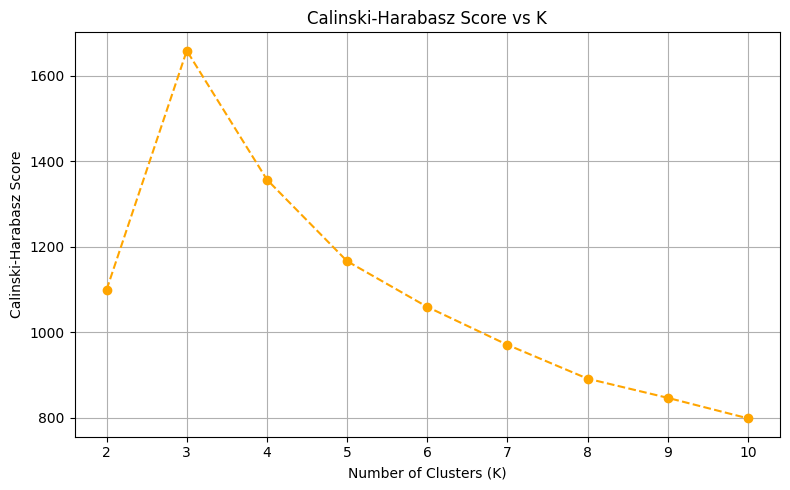

K=2 -> CH Score: 1099.3855
K=3 -> CH Score: 1658.9585
K=4 -> CH Score: 1357.1291
K=5 -> CH Score: 1166.1172
K=6 -> CH Score: 1059.0230
K=7 -> CH Score: 970.2242
K=8 -> CH Score: 890.9679
K=9 -> CH Score: 846.0771
K=10 -> CH Score: 798.0775


In [ ]:
ch_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled_df)
    score = calinski_harabasz_score(X_scaled_df, labels)
    ch_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, ch_scores, marker='o', linestyle='--', color='orange')
plt.title('Calinski-Harabasz Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print scores
for k, s in zip(k_range, ch_scores):
    print(f"K={k} -> CH Score: {s:.4f}")


Task 4.1: Apply K-Means with Optimal k

In [ ]:
kmeans_final = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_final.fit(X_scaled_df)

# Get cluster labels
labels = kmeans_final.labels_

# Add labels to original dataframe
df['Cluster'] = labels

print("Cluster Sizes:")
print(pd.Series(labels).value_counts().sort_index())

# Print cluster centroids
print("\nCluster Centroids (Scaled):")
centroids_df = pd.DataFrame(kmeans_final.cluster_centers_, columns=features)
print(centroids_df.round(4))

Cluster Sizes:
0    176
1    166
2    204
Name: count, dtype: int64

Cluster Centroids (Scaled):
   daily_screen_time_hours  ...  current_sem_CGPA
0                  -0.0879  ...            0.0531
1                  -1.2259  ...            1.2249
2                   1.0734  ...           -1.0426

[3 rows x 5 columns]


Task 4.2: Visualize the Clusters

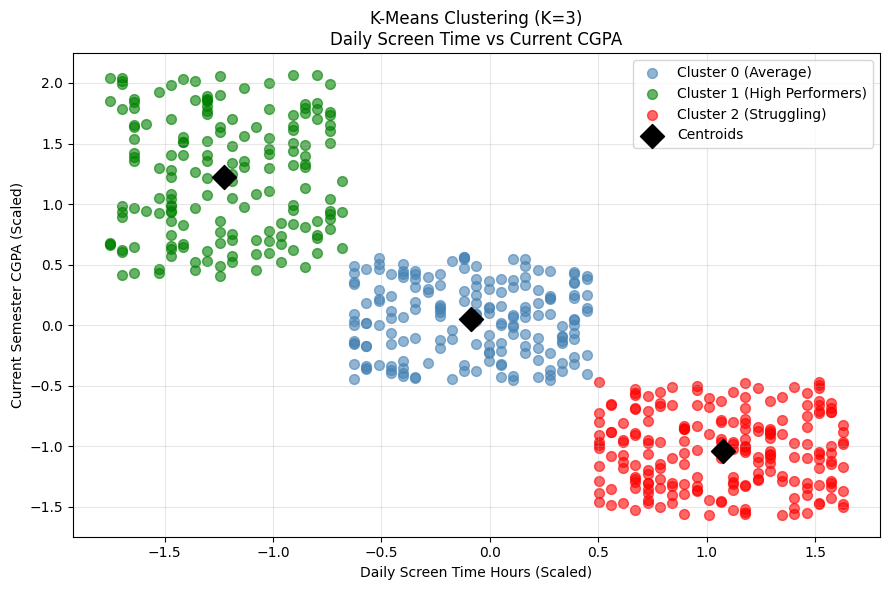

In [ ]:
plt.figure(figsize=(9, 6))

colors = ['steelblue', 'green', 'red']
cluster_names = ['Cluster 0 (Average)', 'Cluster 1 (High Performers)', 'Cluster 2 (Struggling)']

for i in range(3):
    mask = labels == i
    plt.scatter(X_scaled_df.loc[mask, 'daily_screen_time_hours'], 
                X_scaled_df.loc[mask, 'current_sem_CGPA'],
                c=colors[i], label=cluster_names[i], alpha=0.6, s=50)

plt.scatter(centroids_df['daily_screen_time_hours'], 
            centroids_df['current_sem_CGPA'],
            c='black', marker='D', s=150, zorder=5, label='Centroids')

plt.title('K-Means Clustering (K=3)\nDaily Screen Time vs Current CGPA')
plt.xlabel('Daily Screen Time Hours (Scaled)')
plt.ylabel('Current Semester CGPA (Scaled)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Task 4.3: Cluster Profiling & Interpretation

In [73]:
# a) Cluster labels already added to df earlier, just confirm
print(df['Cluster'].value_counts().sort_index())

# b) Compute mean of each feature grouped by cluster
cluster_means = df.groupby('Cluster')[features].mean().round(2)
print(cluster_means)

Cluster
0    176
1    166
2    204
Name: count, dtype: int64
         daily_screen_time_hours  ...  current_sem_CGPA
Cluster                           ...                  
0                           6.95  ...              7.40
1                           4.94  ...              8.78
2                           9.01  ...              6.12

[3 rows x 5 columns]
